## This file contains the code for [Kaggle's Titanic prediction competition](https://www.kaggle.com/c/titanic/overview/description) where the goal was to predict if a passanger has survived the sinking or not (Classification problem). 


### Table of Contents

* [1 - Initial steps](#1)
    * [1.1 - Importing the data](#1.1)
    * [1.2 - Exploring the dataset](#1.2)
* [2 - Preprocessing/Data cleaning](#2)
    * [2.1 - Feature selection](#2.1)
    * [2.2 - Handling missing/null values](#2.2)
* [3 - Model selection](#3)
    * [3.1 - Logistic regression](#3.1)
    * [3.2 - Support vector machine - SVM](#3.2)
    * [3.2 - Random forest classifier](#3.2)
* [4 - Results](#4)    

## 1. Initial steps <a class="anchor" id="1"></a>
### 1.1. Importing the data <a class="anchor" id="1.1"></a> 
> The dataset available for the competition was already divided into [test](https://www.kaggle.com/c/titanic/data?select=test.csv) and [train](https://www.kaggle.com/c/titanic/data?select=train.csv) samples. The first step is to import both dataset into the notebook into a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame).


In [1]:
# import pandas
import pandas as pd

#importing the train and test dataset
train = pd.read_csv('../input/titanic/train.csv', sep=',')
test = pd.read_csv('../input/titanic/test.csv', sep=',')

#Print the first rows to see if the dataset was imported correctly
print("------------------------ TRAIN DATAFRAME FIRST ROWS ------------------------\n")
print(train.head())
print("\n------------------------ TEST DATAFRAME FIRST ROWS ------------------------\n")
print(test.head())

------------------------ TRAIN DATAFRAME FIRST ROWS ------------------------

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53

### 1.2. Exploring the dataset <a class="anchor" id="1.2"></a>
> That dataset was successfully imported into the train and test dataset. Now we can begin exploring the dataset. A good practice is to build a data dictionary so we can others can clearly understand what each column in our dataset is representing. Before building our data dictionary, let's see which columns we have in both datasets. We can use the [.columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html?highlight=columns#pandas.DataFrame.columns) or [.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method from pandas.

In [2]:
print("------------------------ TRAIN DATAFRAME INFO ------------------------\n")
print(train.info())
print("\n------------------------ TEST DATAFRAME INFO ------------------------\n")
print(test.info())

------------------------ TRAIN DATAFRAME INFO ------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

------------------------ TEST DATAFRAME INFO ------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 

> We can see that for the test dataset the column 'Survived' (target) was not provided. This is because our model has to predict the outcome. Usually, the ground truth, or the target column, is provided so we can measure our model against the unseen data, but for the Kaggle competition, normally we submit our prediction and they would compare our measures against the ground truth and rate the performance of your model using the appropriate metrics. That being said, let's now build our data dictionary. I will divide the dictionary into features(columns) which are the measured inputs of the problem domain, the independdent variables, and target which is the dependent variable or the measure we're trying to model or forecast [ref](https://datascience.stackexchange.com/questions/38188/classifying-data-in-orange-whats-the-difference-between-features-target-va).

------
**<font color='blue'>Target</font>**:

| **Column** | **Description** | **Key** | **Type** |
| :-: | :-: | :-: | :-: |
| *Survived* | If the passanger had survived or not | 0 = No; 1 = Yes | int64 |

**<font color='red'>Features</font>**:

| **Column** | **Description** | **Key** | **Type** |
| :-: | :-: | :-: | :-: |
| *PassengerId* | Unique Id to identify a passenger |  | int64 |
| *Pclass* | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | int64 |
| *Name* | Passanger Name |  | object |
| *Sex* | Passenger biologic sex | Male, Female | object |
| *Age* | Passenger age |  | float64 |
| *SibSp* | Number of siblings / spouses aboard the Titanic |  | int64 |
| *Parch* | Number of parents / children aboard the Titanic |  | int64 |
| *Ticket* | Ticket number |  | object |
| *Fare* | Passenger fare |  | float64 |
| *Cabin* | Cabin number |  | object |
| *Embarked* | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | object |

> Our next step is towards to try to identify which of this features would be resonable responsible for the survival or not of the passenger. 

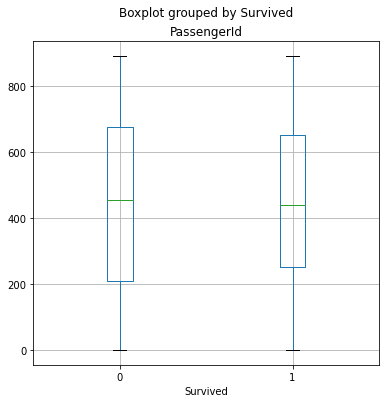

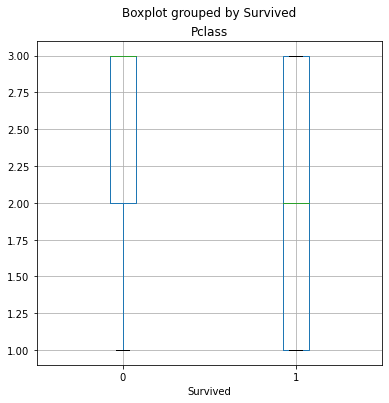

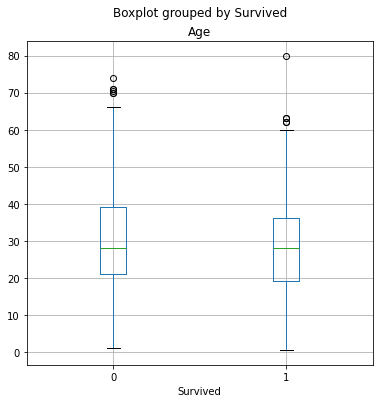

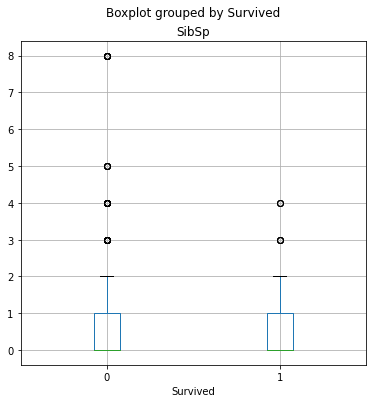

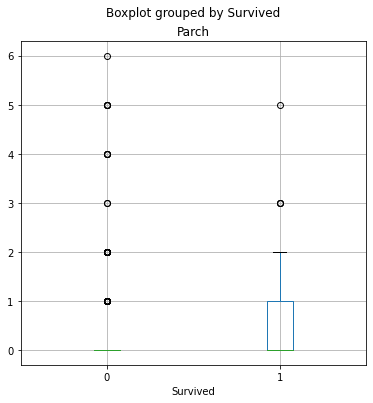

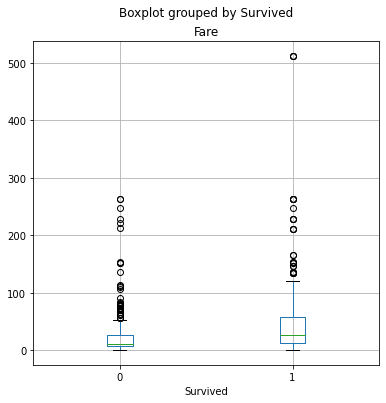

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

numeric_features = ["PassengerId","Pclass","Age","SibSp","Parch", "Fare" ]
for col in numeric_features:
    train.boxplot(column=col, by="Survived", figsize=(6,6))
    plt.title(col)
plt.show()

> For some of the features, there's a noticable difference in the distribution for each label value. In particular, **Fare**, **Pclass**, and **Age** show markedly different distributions for survived passengers than for non-survived passengers. It is also clear that birth sex played impact wether a person survived or not. In order to feed the sex feature into the model we first need to encode it.

In [4]:
# use a for loop to perfom the encoding on both dataframes
for df in [train,test]:
    df['Sex_encode']=df['Sex'].map({'male':1,'female':0})
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## 2. Preprocessing/Data cleaning <a class="anchor" id="2"></a>
### 2.1. Feature selection <a class="anchor" id="2.1"></a>
> We can see that we have a new column **Sex_encode** on our dataframes. After performing the encode, we need to properly handle the missing values, if we got any. However, now that we already determined which features are gonna be usefull for us, we can drop the ones we are not gonna use, in order to have a concise dataframe.

In [5]:
# dropping apparently unnecessary features 
for df in [train,test]:
    df.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', "Sex"],axis=1, inplace=True)
# testing if the dropping columns worked
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Sex_encode'], dtype='object')

### 2.2. Handling missing/null values <a class="anchor" id="2.2"></a>
> Now let's check if we have any missing value in our remaining dataframe

In [6]:
# inspecting the data for missing values
print("------------------------ TRAIN DATAFRAME MISSING VALUES COUNT ------------------------\n")
print(train.isnull().sum())
print("------------------------ TEST DATAFRAME MISSING VALUES COUNT ------------------------\n")
print(test.isnull().sum())

# percentage of missing data on Age column on each dataframe
print(f"TRAIN DATAFRAME MISSING VALUES : {round(train['Age'].isnull().sum()*100/train.shape[0], 2)}%")
print(f"TEST DATAFRAME MISSING VALUES : {round(test['Age'].isnull().sum()*100/test.shape[0],2)}%")

------------------------ TRAIN DATAFRAME MISSING VALUES COUNT ------------------------

PassengerId      0
Survived         0
Pclass           0
Age            177
Sex_encode       0
dtype: int64
------------------------ TEST DATAFRAME MISSING VALUES COUNT ------------------------

PassengerId     0
Pclass          0
Age            86
Sex_encode      0
dtype: int64
TRAIN DATAFRAME MISSING VALUES : 19.87%
TEST DATAFRAME MISSING VALUES : 20.57%



> We can see that we have missing values for "Age" feature on both dataframes. If we use the *.shape\[0\]* method we can see that we have 891 and 418 samples on train and test dataframes, respectively. If we just delete the missing values, we would be erasing around 20% of the information, which is could be critical for our model performance. In other hand, we can impute the missing data with another value.
On [jlawman notebook](https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission), he assumes that all passengers without an registered age were babies, imputing the missing values with '0'. However, assuming a new value like zero could cause the model to be skewed in that direction. The best approach would be to filled the missing values with the mean.


In [7]:
# saving this state of the dataset in case we decide for a new approach
train_cp = train
test_cp = test

train.fillna(train.Age.mean(), inplace=True)
test.fillna(test.Age.mean(), inplace=True)
# checking if the transformations worked
print("------------------------ TRAIN DATAFRAME MISSING VALUES COUNT ------------------------\n")
print(train.info())

------------------------ TRAIN DATAFRAME MISSING VALUES COUNT ------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   Sex_encode   891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB
None


## 3. Model selection <a class="anchor" id="3"></a>
> It is time to decide which is the best classification model for this problem. One alterative would be to use [TPOT](http://epistasislab.github.io/tpot/) to find the best pipeline for this data. Although, in oder to find the best pipeline for this dataset, we need the label for the test dataset, which was not provided. We can then try a few classification models, and check which on performed best based on the accuracy score. In order to get an accuracy score, we will submit the predictions generated by each model on Kaggle, which will then provide us with the accuracy score.

> The models I will use in this notebook are:
* logistic regression;
* support vector machine - SVM;
* random forest classifier.


As we will need to generate a prediction file for each model,I create a function, based on [ref. notebook](https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission), to automate this part of the workflow.

In [8]:
def generate_submission_file(predictions, model_name=''):
    #building the submission file
    submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
    #Visualize the first 5 rows
    submission.head()
    #Convert DataFrame to a csv file that can be uploaded
    #This is saved in the same directory as your notebook
    filename = 'TitanicPredictions'+model_name.capitalize()+'.csv'
    submission.to_csv(filename,index=False)
    print('Saved file: ' + filename)

### 3.1. Logistic regression <a class="anchor" id="3.1"></a>

[reference for the logreg module on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 

In [9]:
# importing the logreg from sklearn
from sklearn.linear_model import LogisticRegression

# Separating the label and the features on the train dataset
X_train = train.drop('Survived', axis=1)
y_train = train.Survived

#Logistic regression
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(test)

# creating the prediction file for the logistic regression
generate_submission_file(predictions, model_name='LogReg')

Saved file: TitanicPredictionsLogreg.csv


### 3.2. Support vector machine - SVM <a class="anchor" id="3.2"></a>

[reference for the SVM module on sklearn](https://scikit-learn.org/stable/modules/svm.html)

In [10]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train)
predictions = model.predict(test)
generate_submission_file(predictions, 'SVM')

Saved file: TitanicPredictionsSvm.csv


### 3.3. Random forest classifier <a class="anchor" id="3.3"></a>

[reference for the random forest classifier module on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest%20classifier#sklearn.ensemble.RandomForestClassifier) 

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(test)
generate_submission_file(predictions, 'rfc')

Saved file: TitanicPredictionsRfc.csv


## 4. Results <a class="anchor" id="4"></a>

> After submitting each prediction file generated previously, the accuracy scores were as presented:

* Logistic regression -> 0.75837

* Support vector machine -> 0.62200

* Random forest classifier -> 0.75119

> According to Kaggle, the accuracy score the percentage of correct labels predicted by model based on the test dataset labels (ground truth). For example, a score of 0.7  indicates that the model predicted Titanic survival correctly for 70% of people. Apart from the SVM model, all of then had a score above 70%. We also have to take into consideration that all three models were implemented using default setting and a parameters tuning could increase the accuracy of the models. However, in this case, we can notice that the Logistic regression model performed better than the other two models, beign the best choice, in this scenario, to predict survivers for the Titanic disaster.
